### Arbitrary value imputation 

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def impute_NaN(df,variable):
    df[variable+'_zeros'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

<AxesSubplot: >

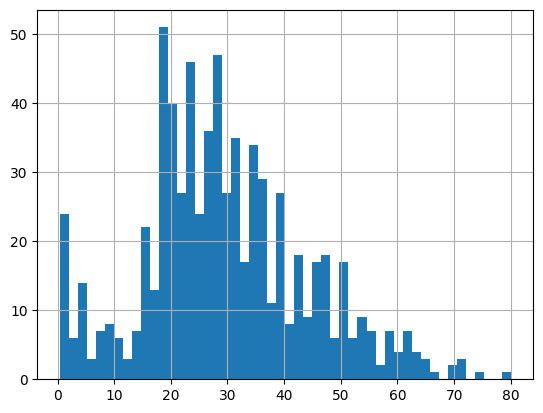

In [3]:
df.Age.hist(bins=50)

 
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

##### How to handle Categorical Missing value

###### Frequent Categorical imputation

In [4]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [5]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [7]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

## Computer the frequency with every feature 

<AxesSubplot: >

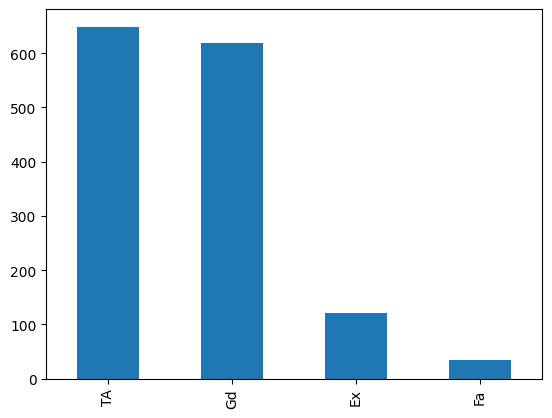

In [8]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot: xlabel='BsmtQual'>

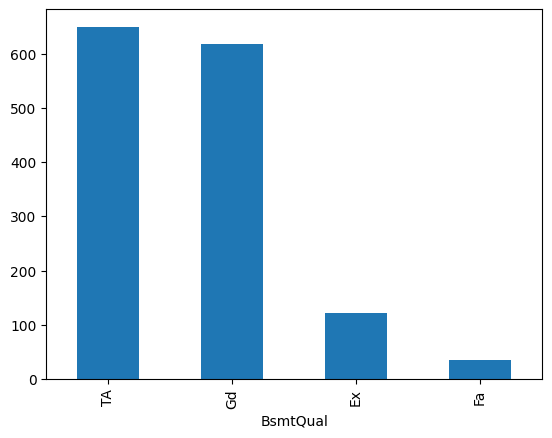

In [9]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot: >

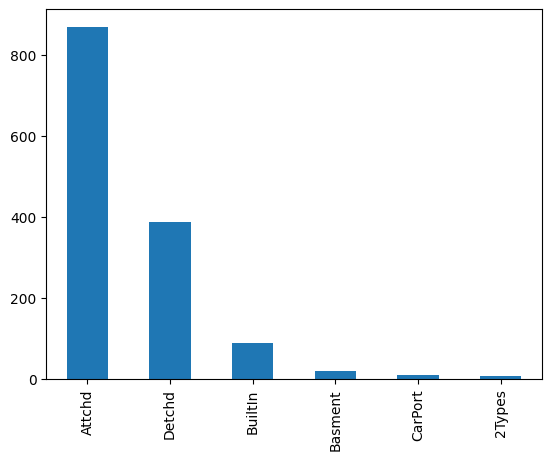

In [10]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot: >

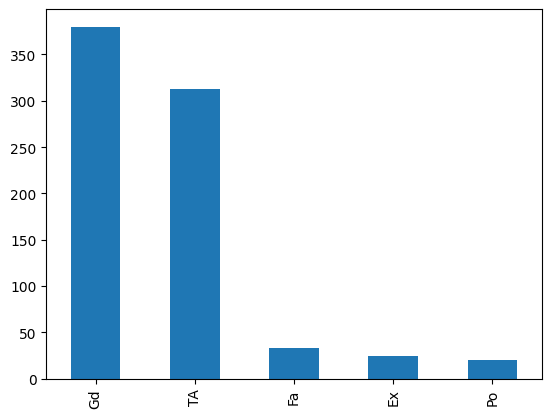

In [11]:
df['FireplaceQu'].value_counts().plot.bar()

In [12]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [13]:
def impute_nan(df,variable):
    df[variable].fillna(df[variable].value_counts().index[0],inplace=True)

In [14]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [15]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [27]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [30]:
def impute_nan(df,variable):
    df[variable+'_newVar'] = np.where(df[variable].isnull(),"Missing",df[variable])

In [31]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [32]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newVar,GarageType_newVar,FireplaceQu_newVar
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [34]:
df = df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1)

In [36]:
df.head()

,SalePrice,BsmtQual_newVar,GarageType_newVar,FireplaceQu_newVar
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
